## Project Description
### Objective
You're working as an analyst for Zuber, a new ride-sharing company that's launching in Chicago. Your task is to find patterns in the available information. You want to understand passenger preferences and the impact of external factors on rides. You'll study a database, analyze data from competitors, and test a hypothesis about the impact of weather on ride frequency.


### Outline

- Web Scraping
    - Write a code to parse the data on weather in Chicago in November 2017 from the website: https://code.s3.yandex.net/data-analyst-eng/chicago_weather_2017.html
- Exploratory Data Analysis I (SQL).
    - Number of trips by company Nov 15-16, 2017
    - Number of trips for companies that include 'Yellow' or 'Blue' in name Nov 1-7, 2017
    - Number of November 2017 trips split by 3 company segments: 'Flash Cab', 'Taxi Affiliation Service', 'Other'
- Hypothesis Testing (SQL)
    - Test the hypothesis that the duration of rides from the the Loop to O'Hare International Airport changes on rainy Saturdays.
- Exploratory Data Analysis (Python)
    - identify the top 10 neighborhoods in terms of drop-offs
    - make graphs: taxi companies and number of rides, top 10 neighborhoods by number of dropoffs
    - draw conclusions based on each graph and explain the results

- Hypothesis Testing (Python)

    - The result of the last query contains data on rides from the Loop to O'Hare International Airport. 

    - Test the hypothesis: "The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."
Decide where to set the significance level (alpha) on your own.
    - Explain: how you formed the null and alternative hypotheses what criterion you used to test the hypotheses and why

### Description of data
SQL Results:
- company_name: taxi company name
- trips_amount: the number of rides for each taxi company on November 15-16, 2017.
- dropoff_location_name: Chicago neighborhoods where rides ended
- average_trips: the average number of rides that ended in each neighborhood in November 2017
- start_ts: pickup date and time
- weather_conditions: weather conditions at the moment the ride started
- duration_seconds: ride duration in seconds

## Exploratory Data Analysis

In [1]:
# Initialize
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st



In [2]:
# Import data
company_df = pd.read_csv('/datasets/project_sql_result_01.csv')
trips_df = pd.read_csv('/datasets/project_sql_result_04.csv')

In [3]:
# Print general/summary info of dataset
company_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


This dataframe contains taxi company names and the number of rides for each taxi company on November 15-16, 2017. No null values.

In [4]:
# Descriptive statistics of the data

company_df.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


Tbe average amount of rides per company is 2145 which is considerably less than the most popular company which recorded about 20000 rides on Nov 15-16, 2017.

In [5]:
# Find top 10 companies
top_10_companies = company_df.sort_values('trips_amount',ascending=False).head(10)
top_10_companies

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


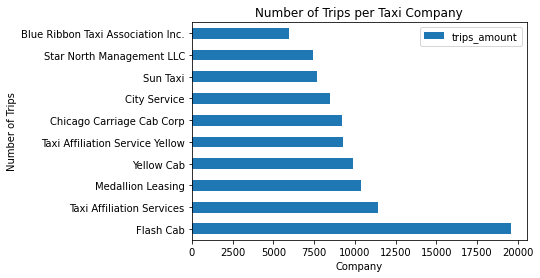

In [6]:
# Graph top 10 taxi companies
top_10_companies = top_10_companies.set_index('company_name')
top_10_companies.plot(kind='barh').set_title('Number of Trips per Taxi Company')
plt.xlabel("Company")
plt.ylabel("Number of Trips")
plt.show()

Flash Cab is overwhelmingly the most popular taxi company, almost double the second, Taxi Affiliation Services.



In [7]:
# Print general/summary info of dataset

pd.DataFrame(trips_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


""


No nulls but average trips is a float which should be an integer as it represented average numnber of trips.



In [8]:
# Convert average_trips column to int
trips_df['average_trips'] = trips_df.average_trips.astype(int) 


In [9]:
# Descriptive statistics of the data

trips_df.describe()

,average_trips
count,94.000000
mean,599.478723
std,1714.555974
min,1.000000
25%,14.000000
50%,51.500000
75%,298.750000
max,10727.000000


In [10]:
# Find top 10 dropoff locations
top_10_dropoff = trips_df.sort_values('average_trips',ascending=False).head(10)

top_10_dropoff

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
5,Lake View,2420
6,Grant Park,2068
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1259


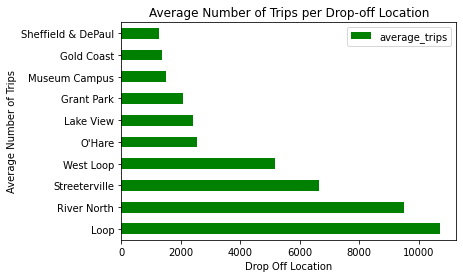

In [11]:
# Graph top 10 dropoff locations

top_10_dropoff = top_10_dropoff.set_index('dropoff_location_name')
top_10_dropoff.plot(kind='barh',color='green')
plt.xlabel("Drop Off Location")
plt.ylabel("Average Number of Trips")
plt.title('Average Number of Trips per Drop-off Location')
plt.show()

Above are the top 10 drop-off locations by number of trips. We can conclude that the most popular area for trips is the Loop neighborhood, which is located near the center of Downtown Chicago.

## Hypothesis Testing

In [12]:
# Import data
loop_ohare = pd.read_csv('/datasets/project_sql_result_07.csv')
loop_ohare

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


In [13]:
# Print general/summary info of dataset

loop_ohare.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


This dataframe contains data on rides specificly from the Loop to O'Hare International Airport. There are 1068 entries with no null values.

In [14]:
# Descriptive statistics 

loop_ohare.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


The average trip duration is  2071 seconds.

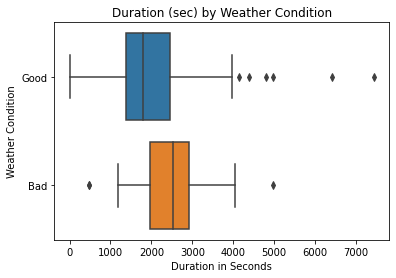

In [15]:
#Check for outliers

sns.boxplot(x="duration_seconds", y="weather_conditions", data=loop_ohare).set_title('Duration (sec) by Weather Condition')
plt.xlabel("Duration in Seconds")
plt.ylabel("Weather Condition");



According to the descriptive statistics table and boxplot above, there are outliers that may affect the accuracy of our analysis and therefore they will be removed.

In [16]:
# Remove outliers
condition = 'Good'
Q1 = loop_ohare['duration_seconds'].quantile(0.25)
Q3 = loop_ohare['duration_seconds'].quantile(0.75)
IQR = Q3 - Q1
print('Q1: ', Q1)
print('Q3: ', Q3)
print('IQR: ', IQR)

#
bottom_cutoff = Q1 - (1.5* IQR)
top_cutoff = Q3 + 1.5 * IQR
if bottom_cutoff < 0:
    bottom_cutoff = 0
print('min: ',bottom_cutoff)
print('max: ',top_cutoff)

Q1:  1438.25
Q3:  2580.0
IQR:  1141.75
min:  0
max:  4292.625


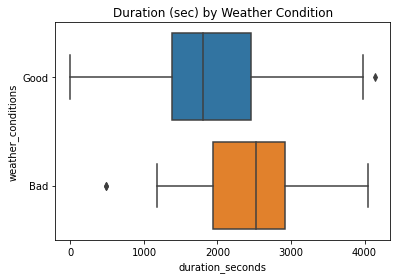

In [17]:
# Remove Outliers

loop_ohare_without_outliers = loop_ohare.query('duration_seconds <= @top_cutoff')
sns.boxplot(x="duration_seconds", y="weather_conditions", data=loop_ohare_without_outliers).set_title('Duration (sec) by Weather Condition')
plt.show()

Test the hypothesis:
"The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."


- Null Hypothesis ($H_O$): "The average duration of rides from the Loop to O'Hare International Airport does not change on rainy Saturdays."
- Alternate Hypothesis ($H_A$):  "The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."


In [18]:
# Hypothesis testing
from scipy import stats as st

alpha = 0.05
sample = loop_ohare_without_outliers.query('weather_conditions == "Good"')
rain_sample = loop_ohare_without_outliers.query('weather_conditions == "Bad"')

results = st.ttest_ind(sample.duration_seconds ,rain_sample.duration_seconds)
print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

p-value:  1.2430038032744411e-13
We reject the null hypothesis


As the p-value is less than 0.05, there is a significant difference between the average duration of rides on good weather days vs bad weather days (and very low chance this difference was caused by randomness). Therefore, we can reject the null hypothesis  accept the alternative hypothesis that the average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.